In [1]:
import scvelo as scv
import cellrank as cr

In [2]:
adata = scv.read("N1KO10.h5ad")
adata

AnnData object with n_obs × n_vars = 2711 × 36601
    obs: 'orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'nCount_ambiguous', 'nFeature_ambiguous', 'nCount_RNA', 'nFeature_RNA', 'orig.ident.1', 'nCount_RNA.1', 'nFeature_RNA.1', 'percent.ribo', 'percent.mito', 'count.mad.lower', 'count.mad.higher', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.2', 'seurat_clusters', 'cell_type', 'RNA_snn_res.1', 'RNA_snn_res.1.6', 'RNA_snn_res.1.2', 'RNA_snn_res.0.6', 'RNA_snn_res.1.4', 'RNA_snn_res.3', 'RNA_snn_res.2'
    var: 'features', 'ambiguous_features', 'spliced_features', 'unspliced_features'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

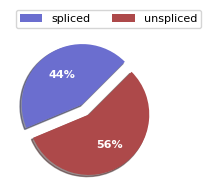

In [3]:
scv.pl.proportions(adata)


In [4]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=20, n_neighbors=30)
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)
scv.tl.recover_dynamics(adata)
scv.tl.latent_time(adata)

Filtered out 25350 genes that are detected 20 counts (shared).
Normalized count data: X, unspliced.
Extracted 2000 highly variable genes.
computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
recovering dynamics (using 1/40 cores)


  0%|          | 0/415 [00:00<?, ?gene/s]

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:697: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:700: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


    finished (0:02:02) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing terminal states
    identified 4 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


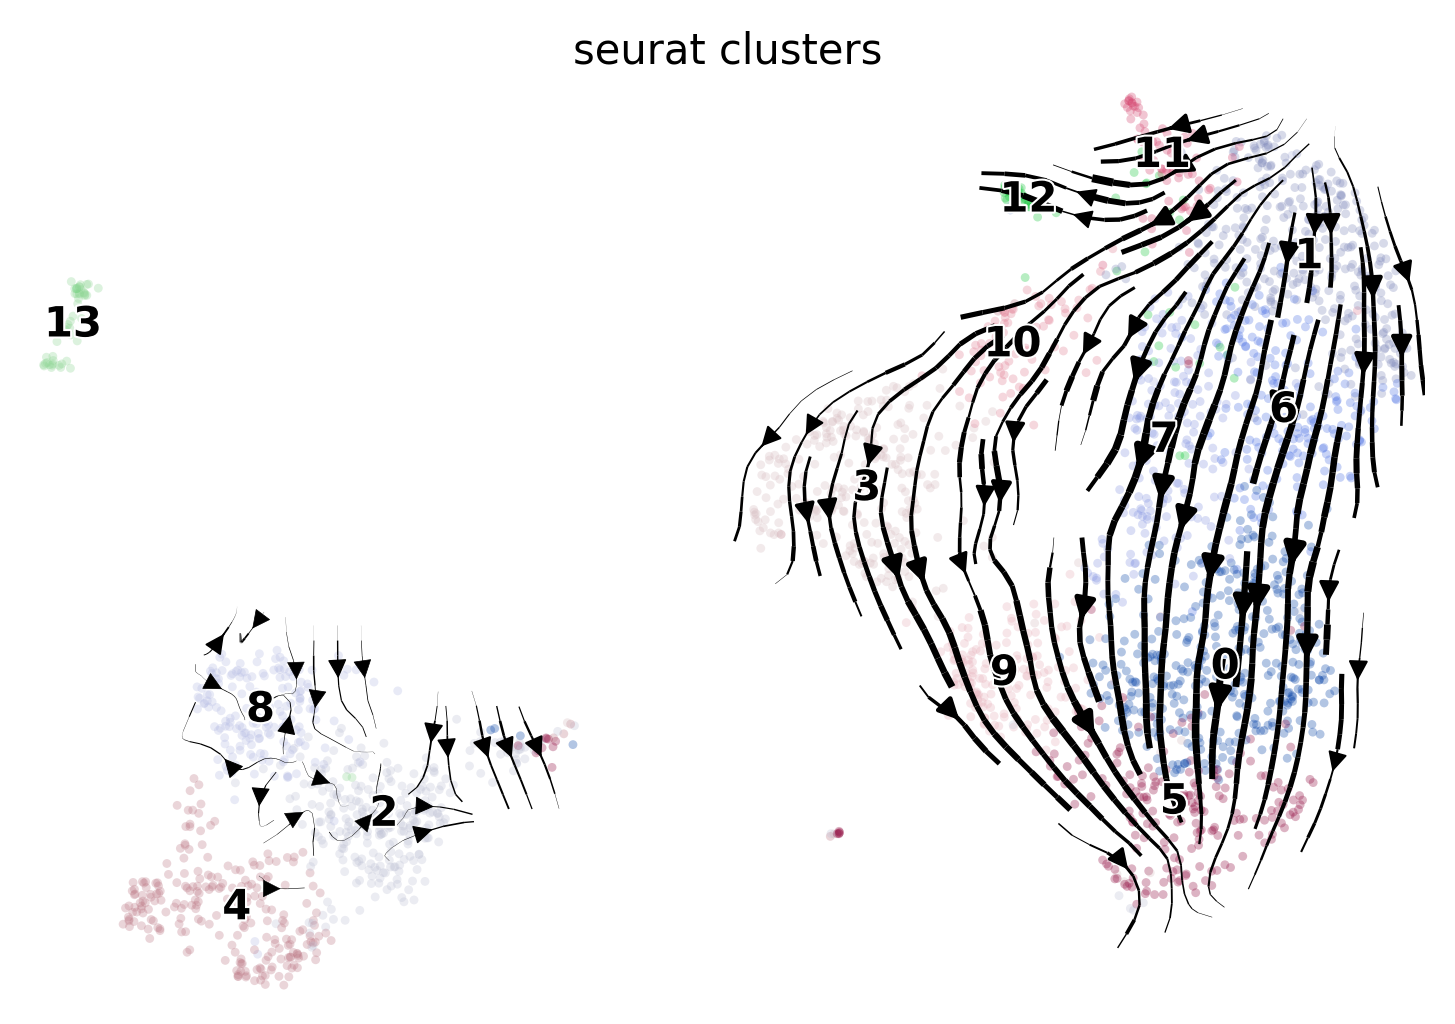

In [12]:
scv.pl.velocity_embedding_stream(adata, basis="umap", color="seurat_clusters",size=18, dpi=300)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


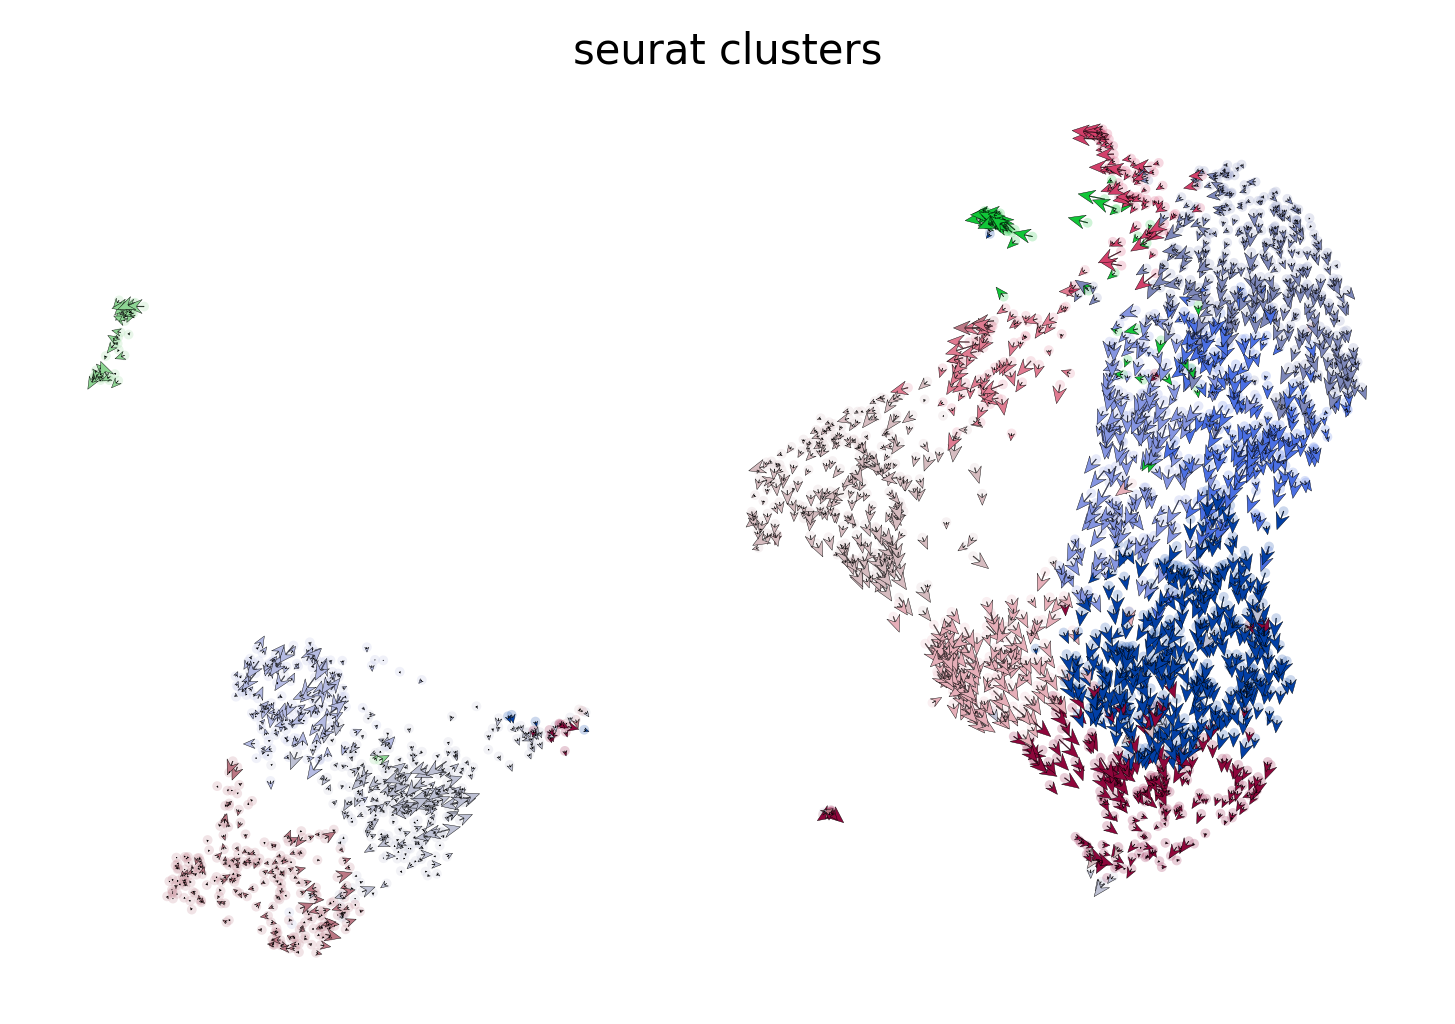

In [13]:
scv.pl.velocity_embedding(adata, basis="umap", color="seurat_clusters", arrow_length=3, arrow_size=2, dpi=300)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


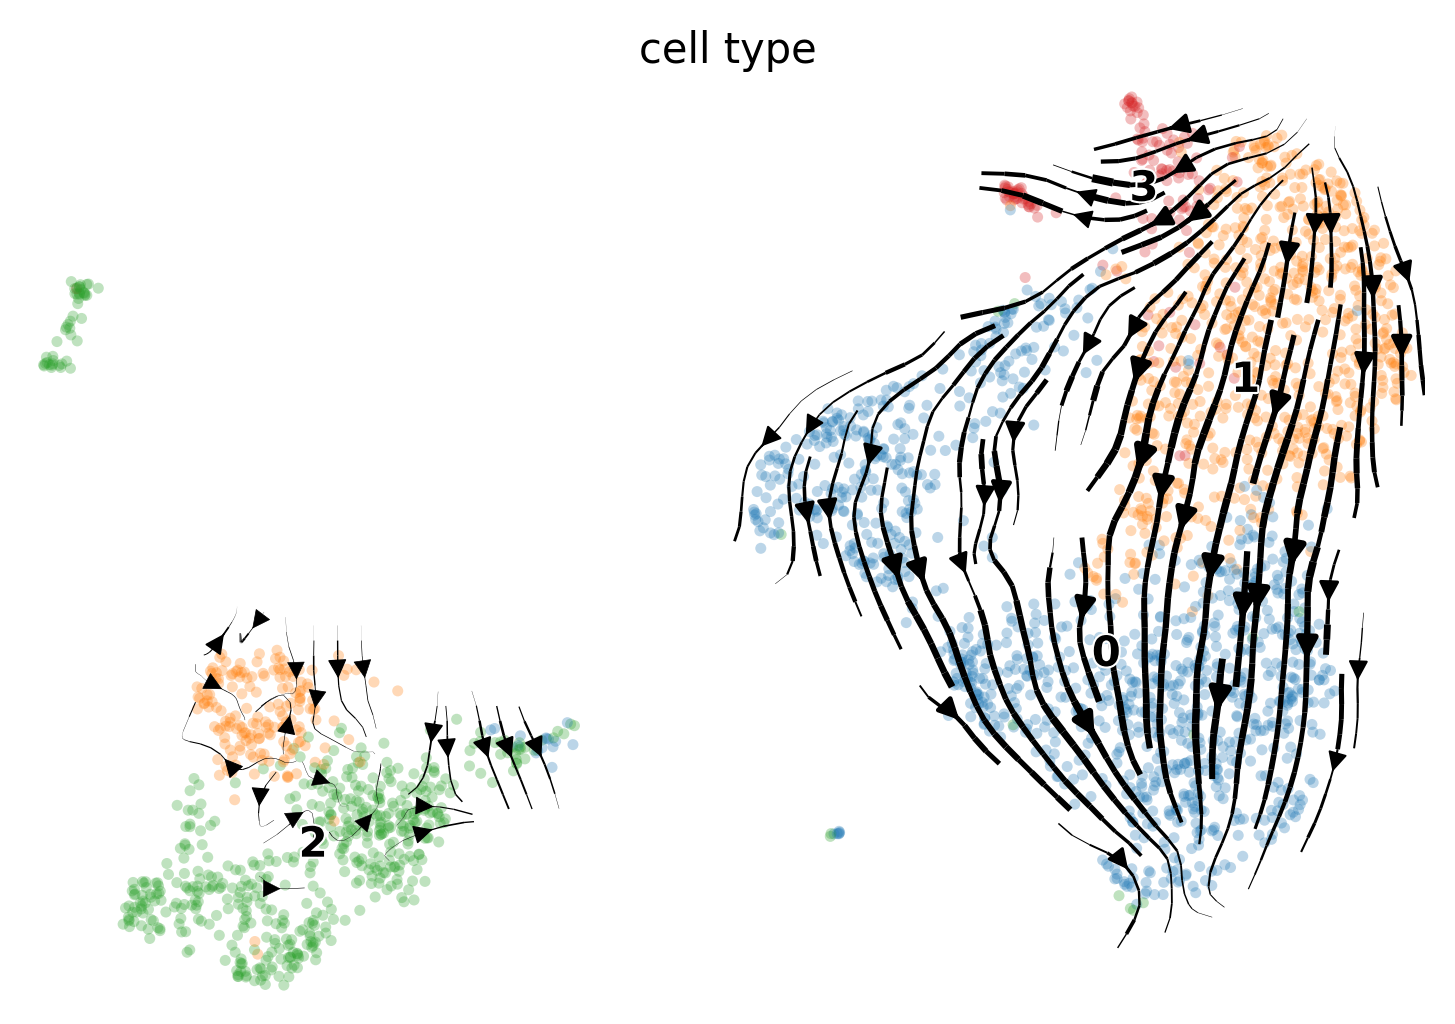

In [14]:
scv.pl.velocity_embedding_stream(adata, basis="umap", color="cell_type",size=28, dpi=300)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


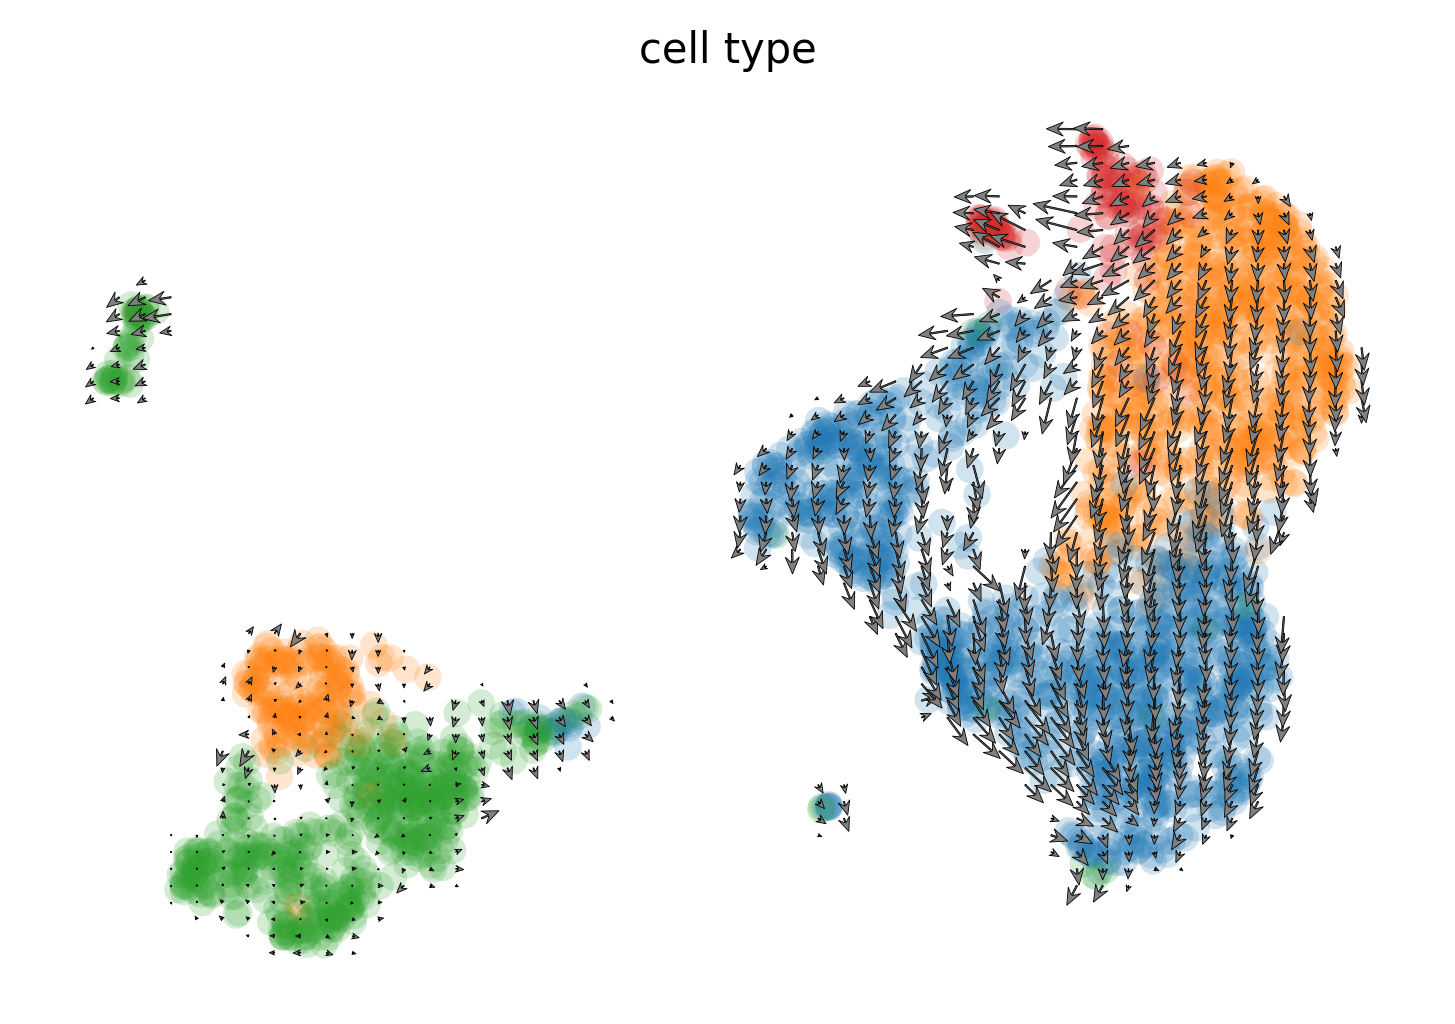

In [15]:
scv.pl.velocity_embedding_grid(adata, basis="umap", color="cell_type", arrow_length=3, arrow_size=2, dpi=300)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


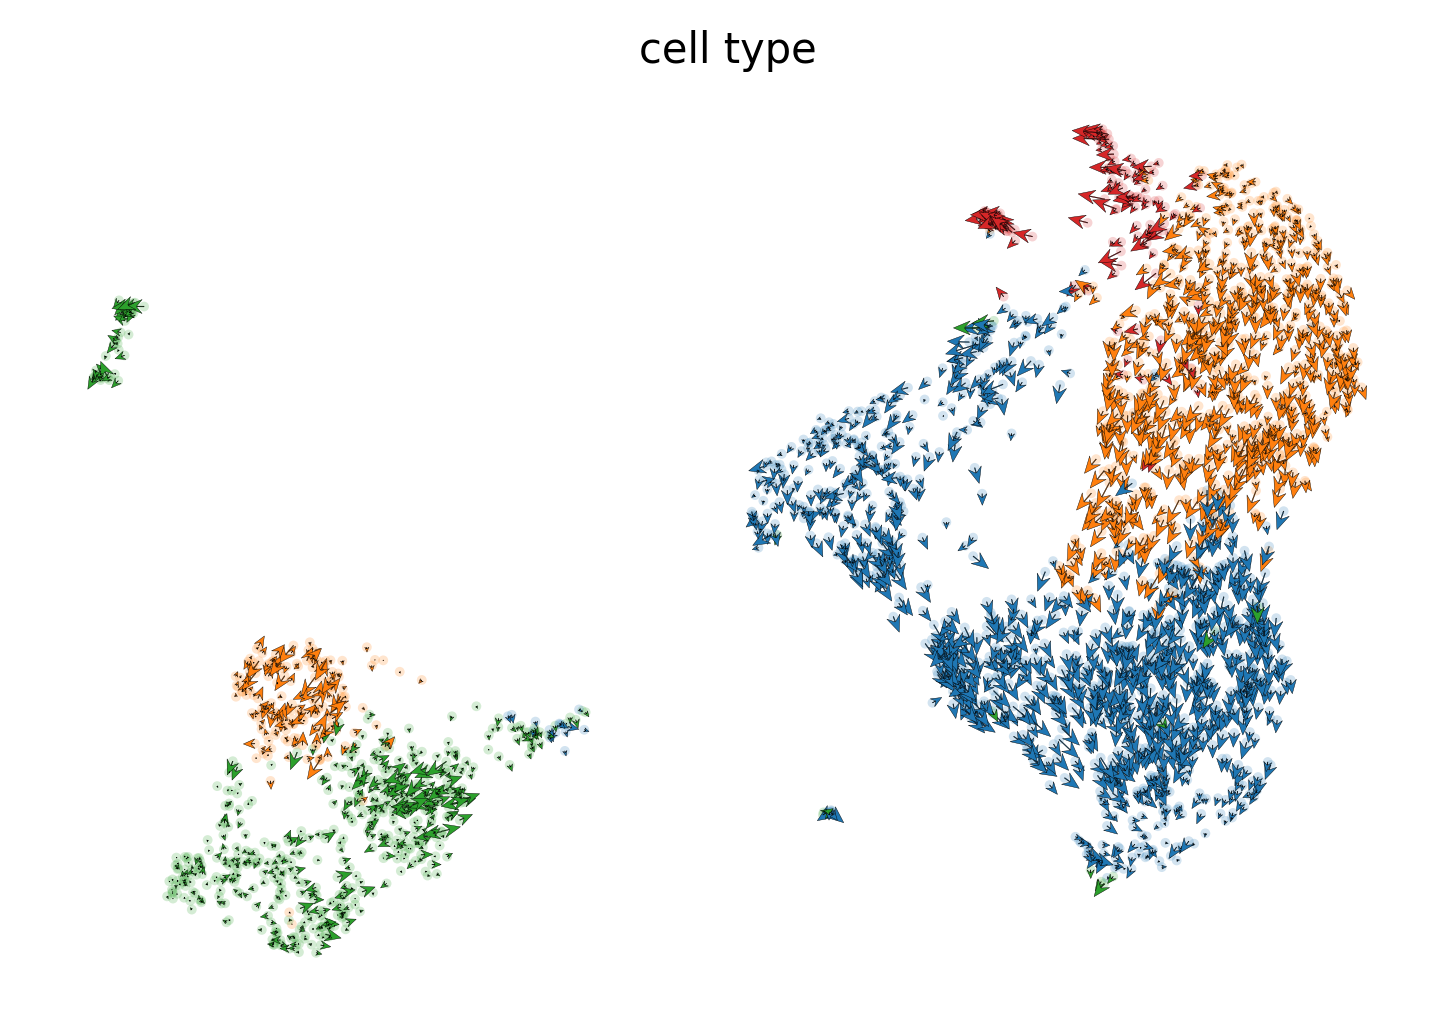

In [16]:
scv.pl.velocity_embedding(adata, basis="umap", color="cell_type", arrow_length=3, arrow_size=2, dpi=300)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


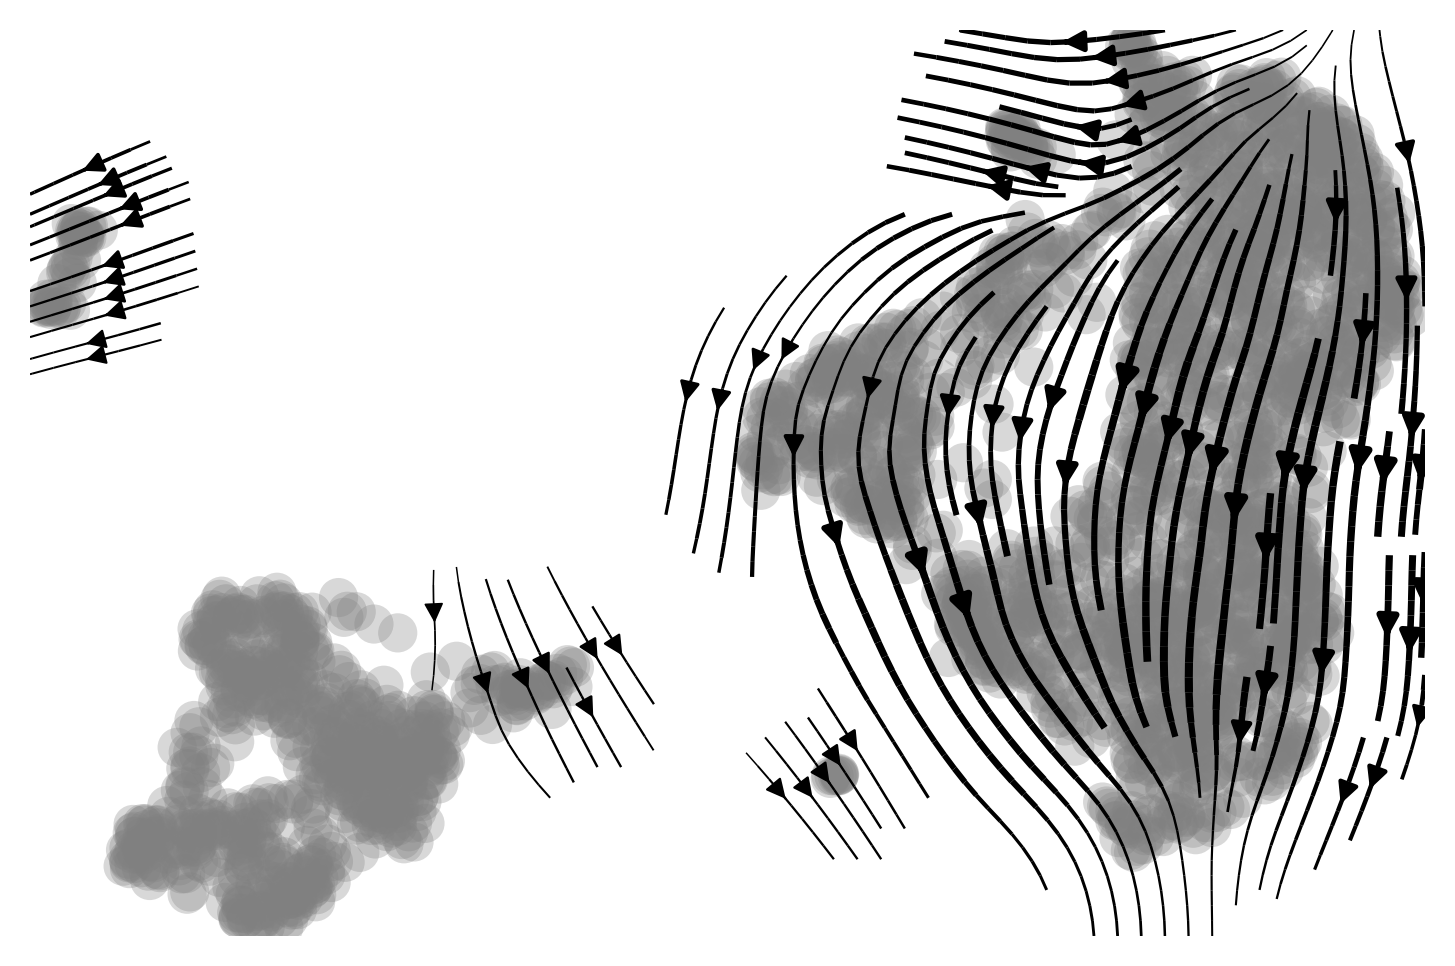

In [17]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", legend_fontsize=12, title="", smooth=2, min_mass=4, dpi=300
)

### Velocity graph and pseudotime


/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


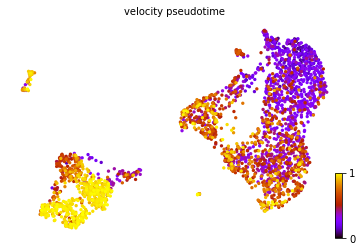

In [18]:
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')

### phase portraits of some marker genes

In [19]:
#scv.pl.velocity(adata, ['PDGFRA'], ncols=1, dpi=300)
#scv.pl.velocity(adata, ['POU5F1'], ncols=1, dpi=300)

### Important genes from velocity

In [20]:
scv.tl.rank_velocity_genes(adata, groupby='cell_type', min_corr=.3)

df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head(30)

ranking velocity genes
    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


0        1         2        3
0   OSBPL10     STC1    SLC8A1    MYH7B
1    PDE10A     GAD1     CMYA5      TEC
2    SH3RF1      TEC    MALAT1     STC1
3    SH3GL3   OSBPL3    NUSAP1   KLHL14
4     STK10    ZMAT4      NEBL     DCP2
5    ZNF107    MYH7B   CACNA1D    ODF2L
6     CYTOR     NTN4     MYOCD  CACNA1C
7     PRMT3     ASPM     RBMS3     DLG5
8    UBE2G2    ADCK5       PBK   PITPNB
9     STAT6    CELF2      HAS2    NDRG3
10   ARFIP1    PAPPA   ADAMTS6    DSCC1
11    KCTD9     DDR2      PKIA     TLE4
12     PCLO    CENPU       TTN     GMPR
13    USP37   LRRTM3       FST   DZIP1L
14   ZNF100      WT1    CTNNA3   LRRTM3
15    SASS6     DCP2      LDB3   OSBPL3
16     RSU1    GAP43     CPEB2  CACNA1D
17   YTHDC2     FJX1        C7     NTN4
18     HPS3  SLC35D1  PPP1R12B    RCSD1
19    PTPN4     HMMR     MEF2C     EZH2
20    TRIQK    CCNA2     CENPF  SH3KBP1
21  TBC1D23    DDAH1    SORBS2     FJX1
22   MAMDC2    CENPE     MYOM1    CENPU
23    PTPRT  SLC7A11      BMP7     RHOU
24     PLK4    ABCG1     CCNB1     XPOT
25    LIN7A   IGFBP5     MYLK3   SLC7A8
26     MYH6    ODF2L    KCNIP2     ZHX1
27   RNF182     RHOU      NFIA    FUBP1
28   FAM83D     DLG5      PSD3  SLC7A11
29     DSN1     DOK5      LMO2    FOXM1

In [21]:
#scv.pl.scatter(adata, 'LINC01695', color=['cell_type', 'velocity'])
#scv.pl.velocity(adata, ['LINC01695'], ncols=1, dpi=300)

### Speed and coherence



--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


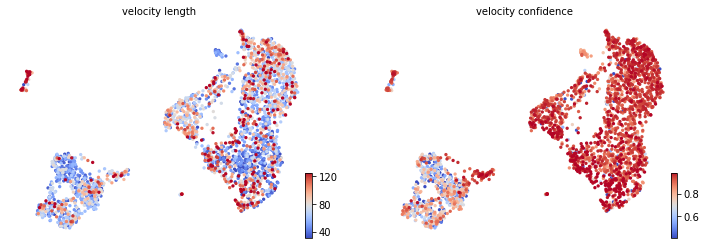

In [22]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

## CellRank

In [23]:
k = cr.tl.transition_matrix(
    adata, weight_connectivities=0.2, softmax_scale=4, show_progress_bar=False
)
cr.tl.terminal_states(adata, cluster_key="cell_type", weight_connectivities=0.2)

### Terminal state

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


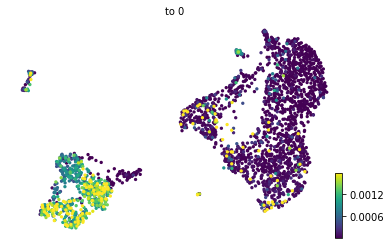

In [24]:
cr.pl.terminal_states(adata)


### Initial state

  0%|          | 0/2711 [00:00<?, ?cell/s]

  0%|          | 0/2711 [00:00<?, ?cell/s]

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


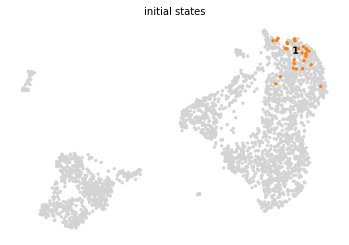

In [25]:
cr.tl.initial_states(adata, cluster_key="cell_type")
cr.pl.initial_states(adata, discrete=True)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


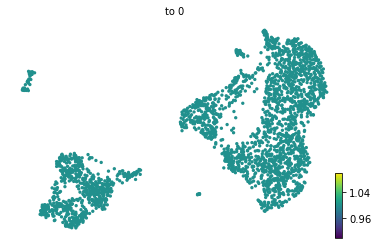

In [26]:
cr.tl.lineages(adata)
cr.pl.lineages(adata, same_plot=False)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


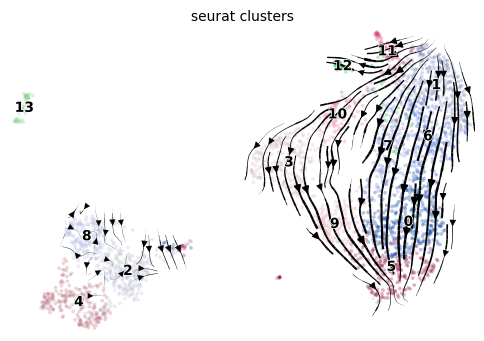

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


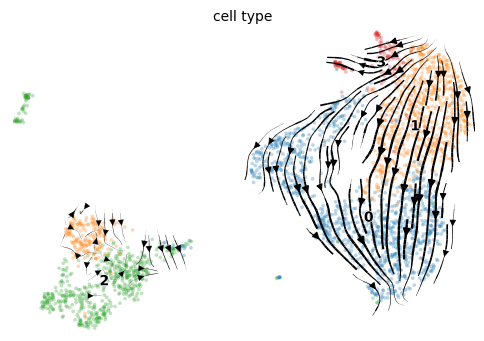

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


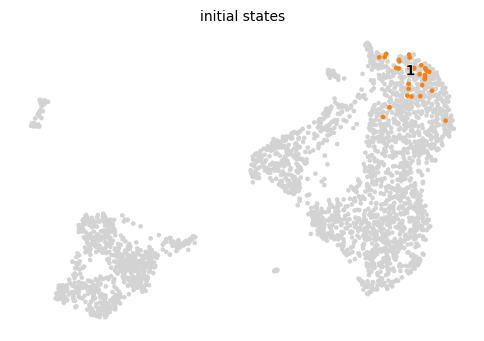

In [27]:
scv.pl.velocity_embedding_stream(adata, basis="umap", color="seurat_clusters",size=28, dpi=100)
scv.pl.velocity_embedding_stream(adata, basis="umap", color="cell_type",size=28, dpi=100)
cr.pl.initial_states(adata, discrete=True, dpi=100)